# Introduction

In this notebook, we explore and analyze a dataset of residential properties in Tehran with the goal of building a machine learning model to predict house prices based on several key features. Accurate house price prediction can be beneficial for both buyers and sellers, offering insights into the factors that most influence property values in the Tehran real estate market.

#### Dataset Description

The dataset contains several features that describe different characteristics of properties:
- **Area**: The total area of the property in square meters.
- **Room**: The number of rooms in the property.
- **Parking**: Indicates whether the property has parking space (1 for yes, 0 for no).
- **Warehouse**: Indicates whether the property includes a warehouse (1 for yes, 0 for no).
- **Elevator**: Indicates the presence of an elevator in the building (1 for yes, 0 for no).
- **Address**: The neighborhood or region where the property is located.
- **Price**: The price of the property in Iranian Rials (IRR), which is the target variable.

In the following sections, we will clean and preprocess the data, perform exploratory data analysis (EDA) to gain insights, and then build a predictive model using linear regression. The model will be trained on a subset of the data and evaluated on its ability to predict house prices.

# Imports and Library Setup

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Reading Data

In [27]:
df = pd.read_csv("data.csv")
print(df.columns)

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')


In [29]:
df.head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33


# Data Cleaning and Preprocessing
I cleaned the data by handling column types (e.g., converting strings to floats and integers) and applying filters to remove outliers or irrelevant entries

In [32]:
df["Area"] = df["Area"].astype(str)
df["Area"] = df["Area"].str.replace("," , "").astype(float)

df["Parking"] = df["Parking"].astype(int)
df["Warehouse"] = df["Warehouse"].astype(int)
df["Elevator"] = df["Elevator"].astype(int)

df = df[df["Area"] < 1000]

## Exploratory Data Analysis (EDA) - Price Distribution
Visualizes the distribution of property prices to understand the overall spread and identify trends or outliers in the price data.

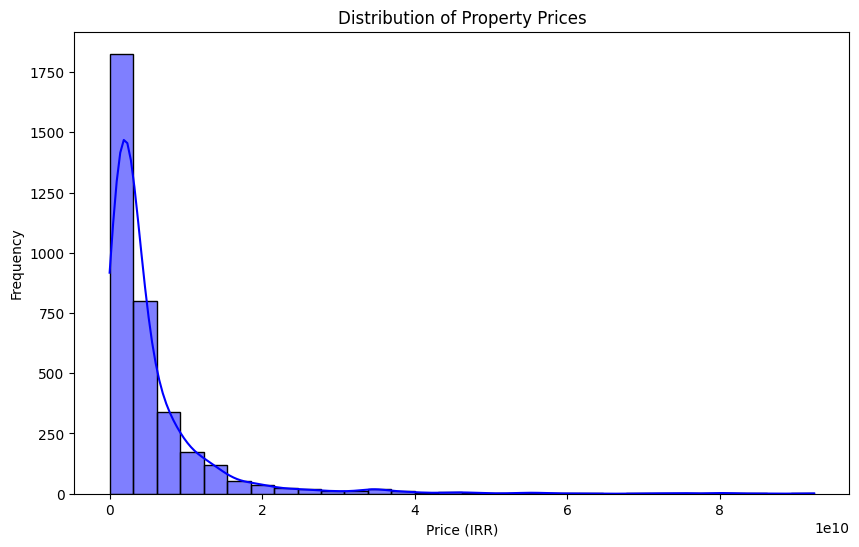

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (IRR)')
plt.ylabel('Frequency')
plt.show()

## EDA - Room Count vs Price
This plot helps examine the relationship between the number of rooms and the property's price, indicating any trends or variations based on room count.

C:\Users\Rayamin\AppData\Local\Temp\ipykernel_13100\264608343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Room', y='Price', data=df, palette='Set3')


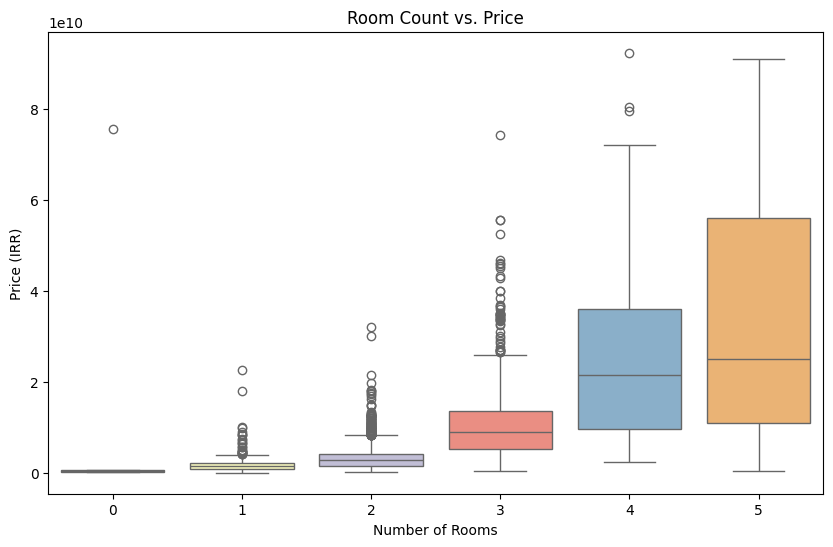

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Room', y='Price', data=df, palette='Set3')
plt.title('Room Count vs. Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (IRR)')
plt.show()

## EDA - Parking vs Price
Visualizes how having parking space impacts the average property price, which can provide insights into the market value of parking in Tehran properties.

C:\Users\Rayamin\AppData\Local\Temp\ipykernel_13100\3508944314.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Parking', y='Price', data=df, palette='Set2', ci=None)
C:\Users\Rayamin\AppData\Local\Temp\ipykernel_13100\3508944314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parking', y='Price', data=df, palette='Set2', ci=None)


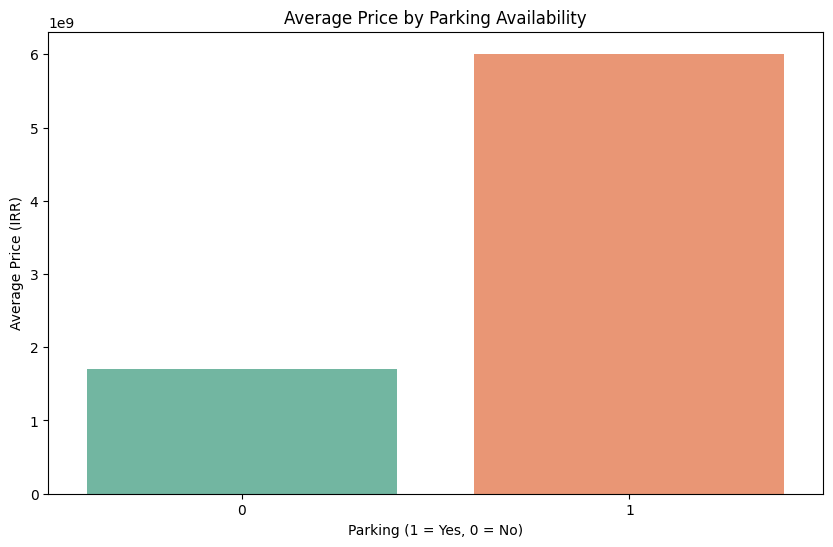

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Parking', y='Price', data=df, palette='Set2', ci=None)
plt.title('Average Price by Parking Availability')
plt.xlabel('Parking (1 = Yes, 0 = No)')
plt.ylabel('Average Price (IRR)')
plt.show()

# Feature Engineering and Preprocessing Pipeline
I defined which features are numerical and categorical, and i set up pipelines to handle missing values and applied OneHotEncoding to categorical variables.This prepares the data for model training

In [44]:
X = df.drop(columns = ["Price" , "Price(USD)"])
y = df["Price"]

numerical_features =["Area" , "Room"]
numerical_transformer = SimpleImputer(strategy = "mean")

categorical_features = ["Parking" , "Warehouse" , "Elevator" , "Address"]
categorical_transformer = Pipeline(steps = [("imputer" , SimpleImputer(strategy = "most_frequent")) , 
                                              ("onehot" , OneHotEncoder(handle_unknown = "ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Train-Test Split
The dataset is split into training and testing subsets, where 80% of the data is used for training and 20% for testing the model

In [47]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk] 

train_x = train[["Parking", "Warehouse", "Elevator", "Address", "Area", "Room"]]
train_y = train["Price"]

test_x = test[["Parking", "Warehouse", "Elevator", "Address", "Area", "Room"]]
test_y = test["Price"]

# Linear Regression Model Training
This section fits a linear regression model to the training data, incorporating the preprocessor pipeline to handle the transformations. The model coefficients and intercept are printed for interpretation.

In [50]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])
model.fit(train_x, train_y)

print("Coef" , model.named_steps['regressor'].coef_)
print("intercept" , model.named_steps['regressor'].intercept_)


Coef [ 7.04003531e+07  4.06500017e+08  2.54747698e+08 -2.54747698e+08
  6.00333087e+07 -6.00333087e+07  1.29063652e+08 -1.29063652e+08
  3.01415275e+09  6.84825401e+08 -2.91041233e+10  7.62284074e+07
 -1.07648382e+09  2.07710728e+08 -8.44654313e+08  2.95463760e+09
 -6.83091162e+08 -1.53709412e+09 -5.03270624e+08 -3.51184992e+09
 -5.98106605e+08 -3.11419663e+09  7.25270979e+09  1.99354655e+09
 -1.66503253e+09 -1.99341850e+09 -2.43351533e+09  2.75904213e+07
 -3.49538864e+08 -3.50879958e+09 -2.42798379e+09 -3.41430397e+08
 -1.15815029e+09  6.90968414e+08 -6.80118505e+09  1.16408806e+08
  2.09303963e+09 -1.31374815e+10  2.51799435e+09  8.41610006e+08
  1.90283950e+09 -1.32197270e+09 -1.49717219e+09  4.42289295e+09
 -3.50840518e+08  9.45645385e+09  5.57162357e+08 -7.84991567e+07
  1.63985572e+09  3.08576375e+09  1.38534435e+10 -2.83779000e+08
 -2.06591795e+08 -2.22131789e+09  6.15613023e+08  8.32860337e+06
  9.22292310e+09 -8.19401649e+08  2.46704037e+08 -2.19688494e+09
  3.65430318e+10  6.

# Model Evaluation
evaluating the performance of the trained linear regression model on the test data. It calculates key metrics such as MAE, MSE, and R², which help in understanding how well the model predicts house prices.

In [53]:
from sklearn.metrics import r2_score
y_pred = model.predict(test_x)

print("MAE : %.2f" % np.mean(np.absolute(y_pred - test_y)))
print("MSE : %.2f" % np.mean((y_pred - test_y)**2))
print("R2_score : %.2f" % r2_score(test_y , y_pred))


MAE : 1908385060.23
MSE : 11620996626412945408.00
R2_score : 0.78


## Custom Prediction Function
This is a custom function that takes user inputs for house features (e.g., area, room, address, parking) and uses the trained model to predict the house price. An example prediction for a house in "Shahran" is shown, illustrating how to use the model for real-world prediction

In [56]:
def predict_house_price(model , area, room, address, parking, warehouse, elevator):
    data = pd.DataFrame({
        "Area":[area],
        "Room":[room],
        "Address":[address],
        "Parking":[int(parking)],
        "Warehouse":[int(warehouse)],
        "Elevator":[ int(elevator)]
    })
    predicted_price=model.predict(data)
    return predicted_price[0]


area =60
room = 1
address= "Shahran"
parking= False
warehouse= False
elevator = False

predicred_price=predict_house_price(model ,area, room, address, parking, warehouse, elevator )
print(f"predicted price :${predicred_price:.2f}")

predicted price :$1904469510.44


# Conclusion

In this project, we successfully built a machine learning model to predict house prices in Tehran based on key property features. By exploring the dataset, we identified important factors such as area, room count, and the presence of amenities like parking, a warehouse, and an elevator, all of which play a significant role in determining property prices.

We used linear regression as our predictive model and evaluated its performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and the R² score. These metrics helped us assess the accuracy of the model, with reasonably good predictions for unseen data.

Additionally, we implemented a custom prediction function that allows users to input specific property details and obtain price estimates, which could be useful for real estate stakeholders.

In future work, we could explore other machine learning algorithms, like decision trees or random forests, to see if they offer better predictive performance. Moreover, using additional data or incorporating external factors like market trends could further enhance the accuracy of the predictions.